In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

enem = pd.read_json('enem_2023.zip')
enem

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


1. Qual das disciplinas tem a maior amplitude de nota?

In [70]:
enem.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

In [71]:
# Encontrar a coluna com o maior valor em cada linha
maiores_valores = enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática','Redação']].max()
maiores_valores

,0
Linguagens,804.456317
Ciências humanas,763.919695
Ciências da natureza,802.004568
Matemática,807.877902
Redação,1000.000000


In [72]:
# Passo 2: Descobrir qual coluna tem o maior valor absoluto
coluna_mais_alta = maiores_valores.idxmax()  # Nome da coluna com maior valor
valor_mais_alto = maiores_valores.max()  # O maior valor encontrado
print(f'{coluna_mais_alta} com nota {valor_mais_alto}')


Redação com nota 1000.0


2. Qual é a média e a
mediana para cada uma das disciplinas?

In [73]:
# Retirar a coluna Sexo do DataFrame
enem_sem_nulos = enem.drop(columns=['Sexo'])

#Excluir números nulos
enem_sem_nulos = enem_sem_nulos.fillna(0)

#enem_sem_nulos = enem_sem_nulos.fillna(enem_sem_nulos.mean())

enem_sem_nulos

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,0.000000,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,0.000000
996,457.755594,444.616952,542.028624,419.689692,715.984249
997,551.173161,568.769704,508.034658,0.000000,798.408655
998,495.804002,522.125008,414.167228,451.696456,593.392939


In [74]:
# Contar valores nulos por coluna
print(enem_sem_nulos.isnull().sum())

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
dtype: int64


In [75]:
# Calcular a média e mediana de cada coluna
media = enem_sem_nulos.mean()
mediana = enem_sem_nulos.median()

# Percorrer o for para cada coluna do dataframe
for coluna in enem_sem_nulos.columns:

    print(f'A média da coluna {coluna} é {media[coluna]:.2f} e a mediana é {mediana[coluna]:.2f}')

A média da coluna Linguagens é 461.53 e a mediana é 501.78
A média da coluna Ciências humanas é 493.31 e a mediana é 517.58
A média da coluna Ciências da natureza é 411.44 e a mediana é 478.85
A média da coluna Matemática é 495.23 e a mediana é 527.79
A média da coluna Redação é 548.49 e a mediana é 613.49


Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [76]:
#Calcular desvio padrão, removendo a coluna Sexo
desvio_padrao = enem.drop(columns=['Sexo']).std()
desvio_padrao

,0
Linguagens,84.009313
Ciências humanas,77.811519
Ciências da natureza,78.760404
Matemática,86.648100
Redação,115.339972


In [77]:
# Objeto para atribuir os pesos a cada disciplina
pesos = {
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1,
    'Matemática': 4,
    'Redação': 2
}

# Calculando a média ponderada
enem['Média Ponderada'] = sum(enem[col] * peso for col, peso in pesos.items()) / sum(pesos.values())

# Ordenando do maior para o menor
enem = enem.sort_values(by='Média Ponderada', ascending=False)

# Selecionando os 500 melhores (ou todos, se houver menos de 500 no dataset)
df_top500 = enem.head(500)

# Calculando a média das notas desses 500 melhores estudantes
media_top500 = df_top500.mean(numeric_only=True)

media_top500

,0
Linguagens,522.839398
Ciências humanas,529.920191
Ciências da natureza,503.086728
Matemática,547.407965
Redação,652.289598
Média Ponderada,557.289677


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [78]:
# Selecionando os 40 melhores estudantes
df_top40 = enem.head(40)
df_top40

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,658.561320
376,364.096042,582.024626,523.764760,749.912621,872.188740,Não idenficado,657.800943
989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem,648.021091
694,497.493880,609.839007,528.413513,737.175029,693.739043,Mulher,646.941848
965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,645.621045


In [79]:
# Calculando a média e a variância das notas dos 40 aprovados
media_top40 = df_top40.mean(numeric_only=True) #desconsiderar colunas não numéricas
variancia_top40 = df_top40.var(numeric_only=True)

#Média das notas dos 40 aprovados
media_top40

,0
Linguagens,586.276605
Ciências humanas,554.327484
Ciências da natureza,522.298209
Matemática,655.650831
Redação,747.522593
Média Ponderada,636.682742


In [80]:
#Variância das notas dos 40 aprovados
variancia_top40

,0
Linguagens,10535.667205
Ciências humanas,6410.724088
Ciências da natureza,5179.612094
Matemática,6399.325107
Redação,11030.278108
Média Ponderada,295.767504


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

In [81]:
# Calculando Q1 e Q3 para Matemática e Linguagens
Q1_matematica = enem['Matemática'].quantile(0.25)
print(Q1_matematica)
Q3_matematica = enem['Matemática'].quantile(0.75)
print(Q3_matematica)
Q1_linguagens = enem['Linguagens'].quantile(0.25)
print(Q1_linguagens)
Q3_linguagens = enem['Linguagens'].quantile(0.75)
print(Q3_linguagens)

479.172970639175
592.9129628887
458.3605582909
571.6358759278


In [82]:
# Calculando IQR (Intervalo Interquartil)
IQR_matematica = Q3_matematica - Q1_matematica
print(IQR_matematica)
IQR_linguagens = Q3_linguagens - Q1_linguagens
print(IQR_linguagens)

113.73999224952502
113.27531763690007


In [83]:
# Calculando o teto do terceiro quartil (Q3 + 1.5 * IQR)
teto_matematica = Q3_matematica + 1.5 * IQR_matematica
teto_linguagens = Q3_linguagens + 1.5 * IQR_linguagens
print(f'Teto do terceiro quartil para Matemática: {teto_matematica}')
print(f'Teto do terceiro quartil para Linguagens: {teto_linguagens}')

Teto do terceiro quartil para Matemática: 763.5229512629876
Teto do terceiro quartil para Linguagens: 741.5488523831501


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se
não assimétricas?

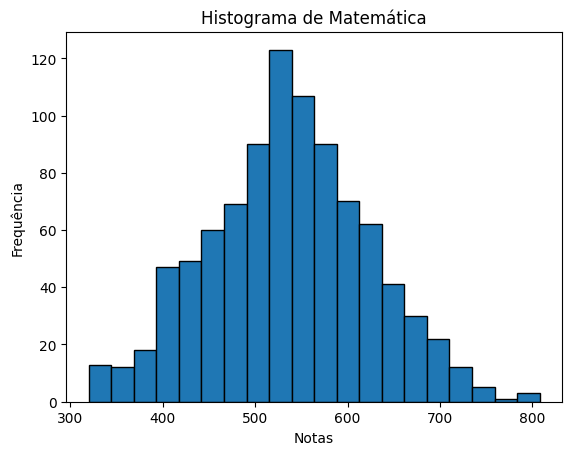

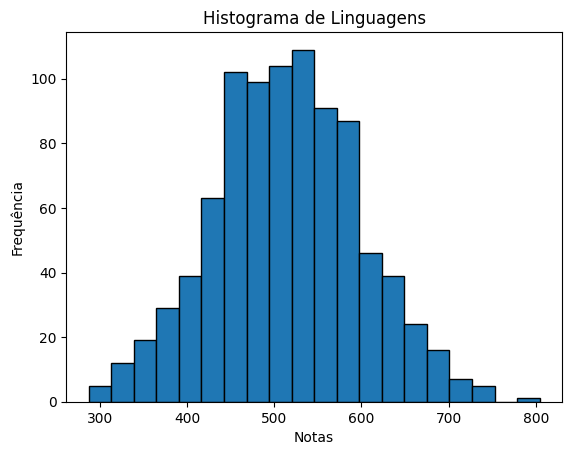

In [84]:
# Criando o histograma para Matemática
plt.hist(enem['Matemática'], bins=20, edgecolor='black')
plt.title('Histograma de Matemática')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Histograma de Linguagens
plt.hist(enem['Linguagens'], bins=20, edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

In [85]:
#A média da coluna Linguagens é 517.47 e a mediana é 517.13
#A média da coluna Matemática é 537.17 e a mediana é 532.96

# Visualmente parece ser simétrico, porém visto que em Linguagens Média > Mediana então é Assimétrico à Direita (positivo)
#E em Matemática Média < Mediana então é Assimétrico à Esquerda (negativo)

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

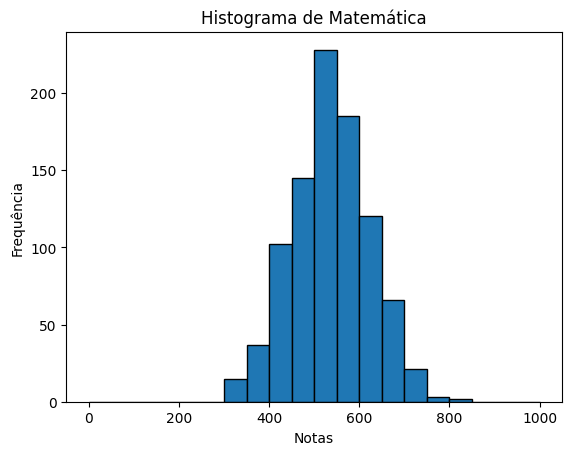

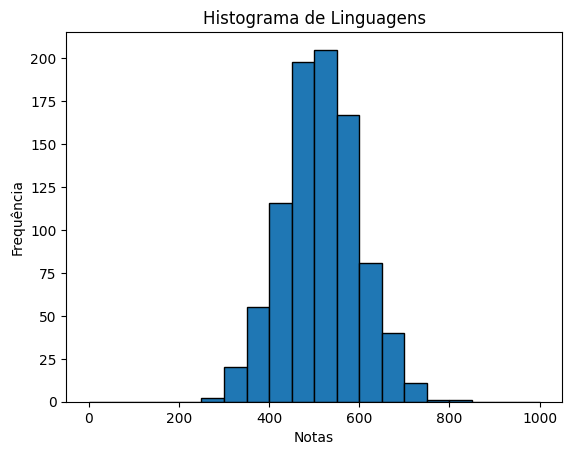

In [86]:
# Criando o histograma para Matemática
plt.hist(enem['Matemática'], bins=20, edgecolor='black', range=[0, 1000])
plt.title('Histograma de Matemática')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

#Criando histograma para linguagens
plt.hist(enem['Linguagens'], bins=20, edgecolor='black', range=[0, 1000])
plt.title('Histograma de Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

In [87]:
# Alterar o range não muda o que foi falado anteriormente, porém fica mais difícil de enxergar essa assimetria visualmente


8. Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.

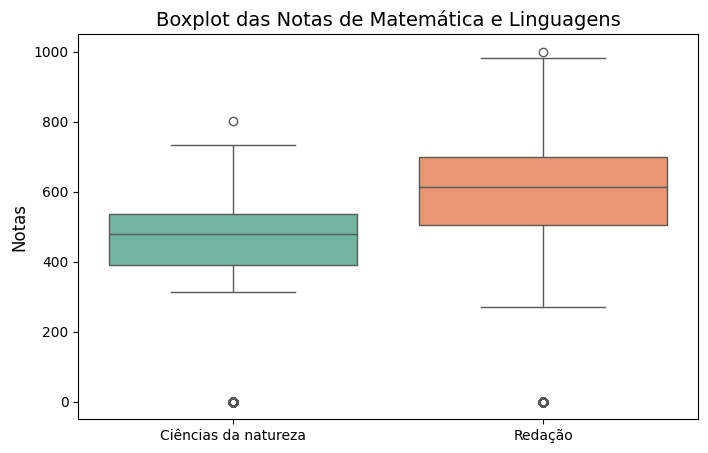

In [88]:
df_natureza_redacao = enem_sem_nulos[['Ciências da natureza', 'Redação']]

# Criando o boxplot
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
sns.boxplot(data=df_natureza_redacao, palette="Set2")  # Gera o boxplot com cores diferentes para cada matéria

# Adicionando título e rótulos
plt.title("Boxplot das Notas de Matemática e Linguagens", fontsize=14)
plt.ylabel("Notas", fontsize=12)

# Exibir o gráfico
plt.show()

In [89]:
# Calcula os quartis da coluna "Ciências da Natureza"
df_natureza = df_natureza_redacao['Ciências da natureza'].quantile([0.25, 0.5, 0.75])

# Define os valores de Q1, Q3 e o IQR
Q1 = df_natureza[0.25]
Q3 = df_natureza[0.75]
IQR = Q3 - Q1

# Define os limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encontra os outliers
outliers_natureza = enem_sem_nulos[(enem_sem_nulos['Ciências da natureza'] < limite_inferior) |
                          (enem_sem_nulos['Ciências da natureza'] > limite_superior)]

# Exibe os outliers
print(outliers_natureza[['Ciências da natureza']])

     Ciências da natureza
1                     0.0
9                     0.0
15                    0.0
16                    0.0
28                    0.0
..                    ...
973                   0.0
975                   0.0
985                   0.0
992                   0.0
999                   0.0

[177 rows x 1 columns]


In [90]:
# Calcula os quartis da coluna "Redação"
df_redacao = df_natureza_redacao['Redação'].quantile([0.25, 0.5, 0.75])

# Define os valores de Q1, Q3 e o IQR
Q1 = df_redacao[0.25]
Q3 = df_redacao[0.75]
IQR = Q3 - Q1

# Define os limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encontra os outliers
outliers_redacao = enem_sem_nulos[(enem_sem_nulos['Redação'] < limite_inferior) |
                          (enem_sem_nulos['Redação'] > limite_superior)]

# Exibe os outliers
print(outliers_redacao[['Redação']])

     Redação
12       0.0
17       0.0
48       0.0
49       0.0
50       0.0
..       ...
981      0.0
984      0.0
985      0.0
991      0.0
995      0.0

[141 rows x 1 columns]


9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um valor
acima de 5%)

In [91]:
# Selecionar apenas as colunas numéricas
colunas_numericas = enem_sem_nulos.select_dtypes(include=[np.number]).columns

# Criar um dicionário para armazenar os outliers de cada coluna
outliers_dict = {}

# Criar uma cópia do DataFrame para armazenar os valores sem outliers
enem_sem_outliers = enem_sem_nulos.copy()

# Loop para calcular os outliers para cada coluna numérica
for coluna in colunas_numericas:
    Q1 = enem_sem_nulos[coluna].quantile(0.25)
    Q3 = enem_sem_nulos[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar os valores outliers
    outliers = enem_sem_nulos[(enem_sem_nulos[coluna] < limite_inferior) |
                              (enem_sem_nulos[coluna] > limite_superior)]

    enem_sem_outliers = enem_sem_outliers[(enem_sem_outliers[coluna] >= limite_inferior) &
                                          (enem_sem_outliers[coluna] <= limite_superior)]
    # Armazenar os outliers no dicionário
    outliers_dict[coluna] = outliers

# Exibir a quantidade de outliers por coluna
for coluna, valores  in outliers_dict.items():
    print(f"Coluna {coluna}: {valores.shape[0]} outliers encontrados.\n")


enem_sem_outliers

Coluna Linguagens: 104 outliers encontrados.

Coluna Ciências humanas: 66 outliers encontrados.

Coluna Ciências da natureza: 177 outliers encontrados.

Coluna Matemática: 79 outliers encontrados.

Coluna Redação: 141 outliers encontrados.



,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147
...,...,...,...,...,...
990,510.183170,549.132853,557.957321,494.758023,795.671459
993,460.925597,382.509978,528.010191,531.189617,579.596477
994,502.990616,552.407982,554.934948,485.703584,566.635561
996,457.755594,444.616952,542.028624,419.689692,715.984249


In [92]:
# Calcular e exibir a média de cada coluna numérica
medias_antes = enem_sem_nulos[colunas_numericas].mean()
medias_depois = enem_sem_outliers[colunas_numericas].mean()
print("Média de cada coluna numérica antes da remoção dos outliers:")
print(medias_antes)
print("Média de cada coluna numérica após a remoção dos outliers:")
print(medias_depois)

# Calcular a variação percentual entre as médias
variacao_percentual = abs(((medias_depois - medias_antes) / medias_antes) * 100)
print("Variação percentual entre as médias antes e depois da remoção dos outliers:")
print(variacao_percentual)

print("Eles são passíveis de alterar a média nacional significativamente, pois a variação percentual > 5%")

Média de cada coluna numérica antes da remoção dos outliers:
Linguagens              461.528754
Ciências humanas        493.311575
Ciências da natureza    411.436040
Matemática              495.232270
Redação                 548.493838
dtype: float64
Média de cada coluna numérica após a remoção dos outliers:
Linguagens              516.517519
Ciências humanas        527.807940
Ciências da natureza    501.627562
Matemática              535.498248
Redação                 640.768688
dtype: float64
Variação percentual entre as médias antes e depois da remoção dos outliers:
Linguagens              11.914483
Ciências humanas         6.992815
Ciências da natureza    21.921152
Matemática               8.130726
Redação                 16.823316
dtype: float64
Eles não são passíveis de alterar a média nacional significativamente, pois não ultrapassou 5%


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média
geral e o desvio padrão.

In [102]:
# Substituir valores 0 por NaN antes de aplicar os métodos de substituição
enem_sem_nulos.replace(0, np.nan)

# Substituir valores nulos por média, mediana e moda
enem_media = enem_sem_nulos.fillna(enem_sem_nulos[colunas_numericas].mean())
enem_mediana = enem_sem_nulos.fillna(enem_sem_nulos[colunas_numericas].median())

enem_moda = enem_sem_nulos.copy()

for coluna in colunas_numericas:
    enem_moda[coluna].fillna(enem_moda[coluna].mode()[0])

#Verificar se não tem nenhum valor zero nos dataframes
#total_zeros = (enem_moda == 0).sum().sum()
#print(total_zeros)

# Calcular média e desvio padrão após substituição
metricas = {}
for metodo, df in zip(["Média", "Mediana", "Moda"], [enem_media, enem_mediana, enem_moda]):
    media_nova = df[colunas_numericas].mean()
    desvio_novo = df[colunas_numericas].std()

    alteracao_media = abs((media_nova - medias_antes) / medias_antes) * 100
    alteracao_desvio = abs((desvio_novo - enem_sem_nulos[colunas_numericas].std()) / enem_sem_nulos[colunas_numericas].std()) * 100

    metricas[metodo] = {
        "Alteração Média (%)": alteracao_media.mean(),
        "Alteração Desvio (%)": alteracao_desvio.mean()
    }

# Determinar a melhor estratégia
melhor_metodo = min(metricas, key=lambda x: (metricas[x]["Alteração Média (%)"], metricas[x]["Alteração Desvio (%)"]))
print("Impacto da substituição dos valores nulos:")
print(pd.DataFrame(metricas))
print(f"A melhor medida de tendência central para substituir os valores nulos foi: {melhor_metodo}")


Impacto da substituição dos valores nulos:
                          Média    Mediana       Moda
Alteração Média (%)   12.836746  12.821327  12.836746
Alteração Desvio (%)   5.787449   5.785076   0.000000
A melhor medida de tendência central para substituir os valores nulos foi: Mediana
